In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

In [25]:
news_df = pd.read_csv('Resources/ticker_news.csv').set_index('ticker')

news_df

,1,2,3,4,5,6,7,8
ticker,,,,,,,,
PLTR,GuruFocus.com,Yahoo Finance Video,Motley Fool,Investor's Business Daily,Motley Fool,Motley Fool,TipRanks,Simply Wall St.
TLRY,Motley Fool,Insider Monkey,Yahoo Finance,Motley Fool,Motley Fool,Motley Fool,GlobeNewswire,Insider Monkey
TSLA,Observer,Yahoo Finance Video,American City Business Journals,Investor's Business Daily,Reuters,TheStreet.com,Investor's Business Daily,Barrons.com
LCID,Yahoo Finance Video,The Wall Street Journal,The Wall Street Journal,Yahoo Finance,Yahoo Finance Video,PR Newswire,Barrons.com,Yahoo Finance Video
AAPL,GuruFocus.com,Yahoo Finance Video,Investor's Business Daily,Investopedia,Barrons.com,Motley Fool,GOBankingRates,Benzinga
NIO,The Wall Street Journal,Yahoo Finance Video,Zacks,Reuters,Motley Fool,Benzinga,Bloomberg,Motley Fool
AMD,GuruFocus.com,GuruFocus.com,Motley Fool,Motley Fool,Investor's Business Daily,Insider Monkey,Simply Wall St.,Motley Fool
AMZN,GuruFocus.com,Insider Monkey,Reuters,Yahoo Finance Video,Bloomberg,GuruFocus.com,FreightWaves,Yahoo Finance
RIVN,Investor's Business Daily,Yahoo Finance Video,Motley Fool,Motley Fool,Motley Fool,Motley Fool,Motley Fool,Barrons.com


In [26]:
categories = pd.unique(news_df.values.flatten())

In [34]:
# Create a new DataFrame to store the publisher counts
publisher_counts = pd.DataFrame(columns=list(categories))

publisher_counts

,GuruFocus.com,Yahoo Finance Video,Motley Fool,Investor's Business Daily,TipRanks,Simply Wall St.,Insider Monkey,Yahoo Finance,GlobeNewswire,Observer,...,Kiplinger,Business Wire,InvestorPlace,Investing.com,The Telegraph,Skift,Fortune,Thomson Reuters StreetEvents,Argus Research,Financial Times


In [48]:
# Create a new DataFrame to store the publisher counts
publisher_counts = pd.DataFrame(columns=['ticker'] + list(categories))

# Loop through each ticker and count the publishers
for i, row in news_df.iterrows():
    ticker = i
    counts = row.value_counts()
    publisher_counts.loc[i] = [ticker] + [counts.get(publisher, 0) for publisher in categories]

publisher_counts.set_index('ticker', inplace=True)

publisher_counts

,GuruFocus.com,Yahoo Finance Video,Motley Fool,Investor's Business Daily,TipRanks,Simply Wall St.,Insider Monkey,Yahoo Finance,GlobeNewswire,Observer,...,Kiplinger,Business Wire,InvestorPlace,Investing.com,The Telegraph,Skift,Fortune,Thomson Reuters StreetEvents,Argus Research,Financial Times
ticker,,,,,,,,,,,,,,,,,,,,,
PLTR,1,1,3,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TLRY,0,0,4,0,0,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
TSLA,0,1,0,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
LCID,0,3,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
AAPL,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NIO,0,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AMD,2,0,3,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AMZN,2,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
RIVN,0,1,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Set the ticker column as the index for better plotting
publisher_counts.set_index('ticker', inplace=True)

In [49]:
publisher_counts.to_csv('Resources/publisher_counts.csv')

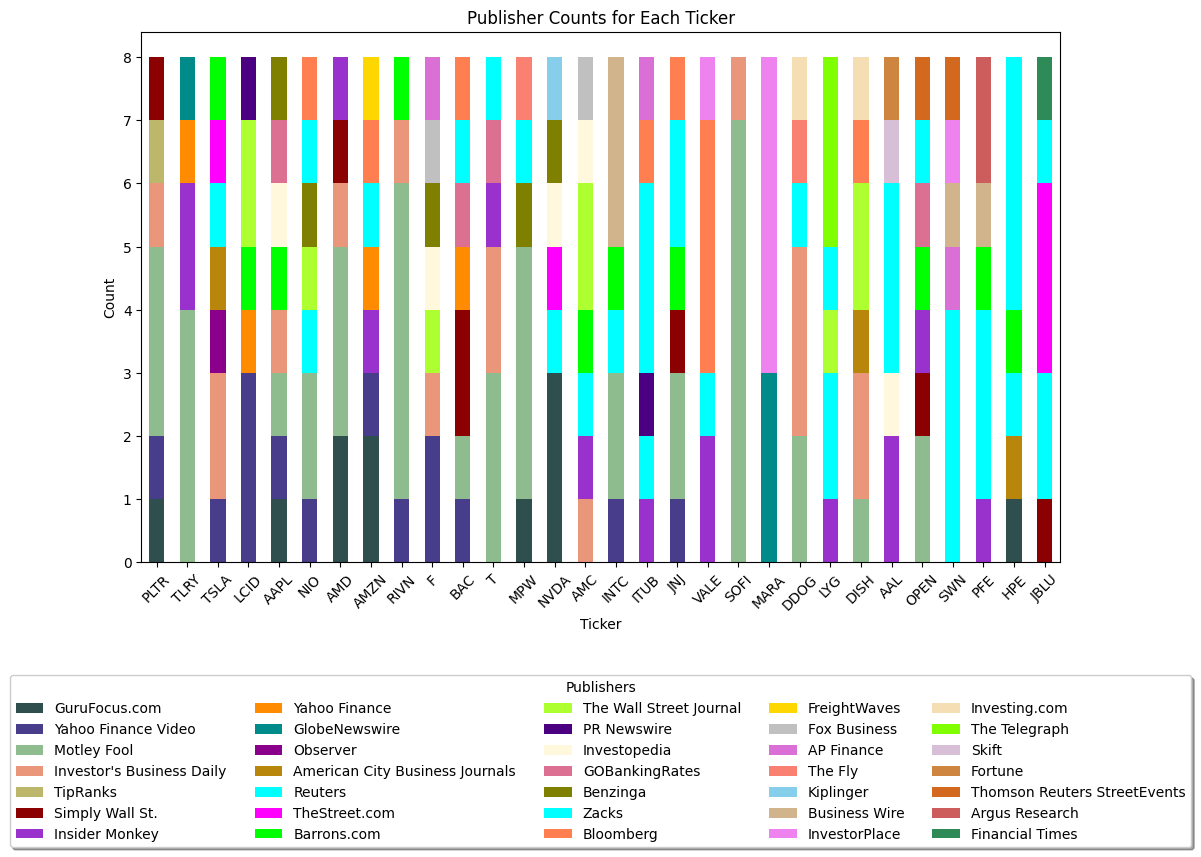

In [50]:
colors = [
    "darkslategrey", "darkslateblue", "darkseagreen", "darksalmon", "darkkhaki", "darkred", "darkorchid", "darkorange", "darkcyan", "darkmagenta",
    "darkgoldenrod", "cyan", "magenta", "lime", "greenyellow", "indigo", "cornsilk", "palevioletred", "olive", "aqua",
    "coral", "gold", "silver", "orchid", "salmon", "skyblue", "tan", "violet", "wheat", "chartreuse",
    "thistle", "peru", "chocolate", "indianred", "seagreen", "slategray", "lavender", "turquoise",
    "plum", "sienna", "aquamarine", "crimson", "darkslategray", "fuchsia", "khaki", "darkgoldenrod"
]

# Plot a stacked bar chart with the custom color palette
ax = publisher_counts.plot(kind='bar', stacked=True, figsize=(12, 9), color=colors)
ax.set_xlabel('Ticker')
ax.set_ylabel('Count')
ax.set_title('Publisher Counts for Each Ticker')
plt.xticks(rotation=45)

# Adjust the legend's position to the bottom
plt.legend(title='Publishers', loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
plt.savefig('Output/publisher_counts.png')

plt.show()


In [63]:
article_counts = {}
for column in publisher_counts.columns[:]:
    article_counts[column] = publisher_counts[column].sum()
    

In [81]:
article_counts_df = pd.DataFrame({
    "publisher": article_counts.keys(),
    "article_counts": article_counts.values()})

In [82]:
article_counts_df = article_counts_df.sort_values(by='article_counts', ascending=False)

article_counts_df

,publisher,article_counts
2,Motley Fool,42
19,Zacks,24
3,Investor's Business Daily,16
11,Reuters,16
6,Insider Monkey,14
1,Yahoo Finance Video,14
0,GuruFocus.com,11
20,Bloomberg,10
13,Barrons.com,10
14,The Wall Street Journal,9


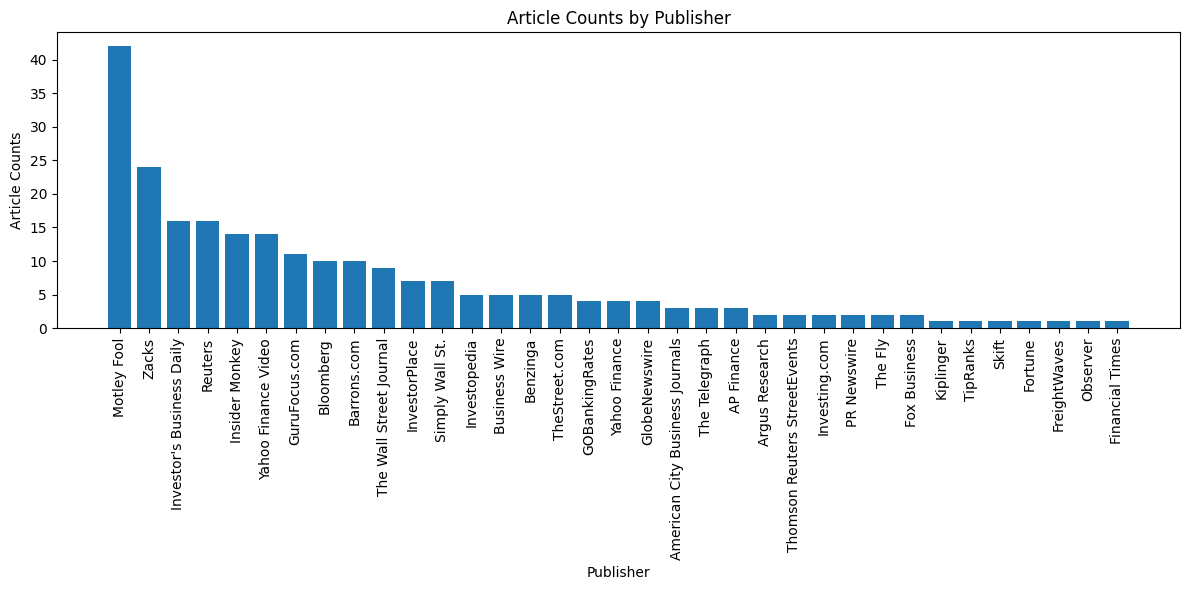

In [85]:
# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(article_counts_df['publisher'], article_counts_df['article_counts'])
plt.xlabel('Publisher')
plt.ylabel('Article Counts')
plt.title('Article Counts by Publisher')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()

plt.savefig('Output/publisher_article_counts.png')

plt.show()